In [155]:
from google.colab import files

uploaded= files.upload()

Saving exchange_rate.csv to exchange_rate (2).csv


# **Part 1: Data Preparation and Exploration**

In [156]:
#!pip install pandas

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df= pd.read_csv("exchange_rate.csv")
df.shape

(7588, 2)

In [159]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [160]:
# Checking for missing values

df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [161]:
# Checking for duplicates

df[df.duplicated()].shape

(0, 2)

In [162]:
# Checking for data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


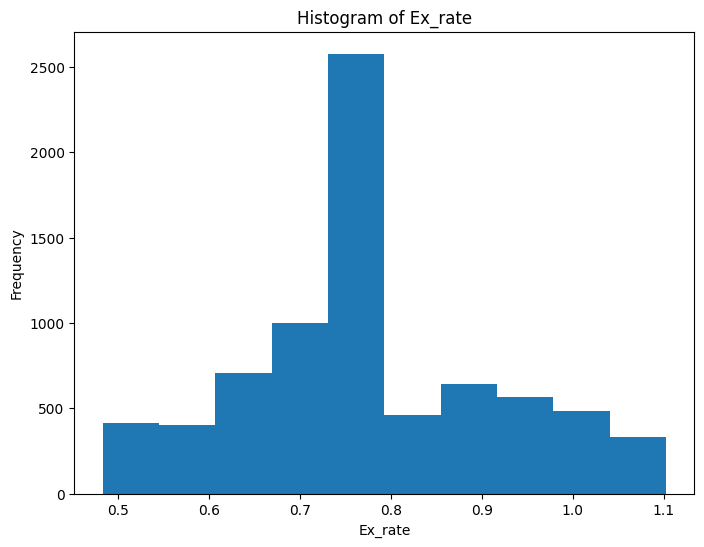

In [163]:
# Histogram to check the distribution of the data

plt.figure(figsize=(8,6))
plt.hist(df["Ex_rate"])
plt.title("Histogram of Ex_rate")
plt.xlabel("Ex_rate")
plt.ylabel("Frequency")
plt.show()

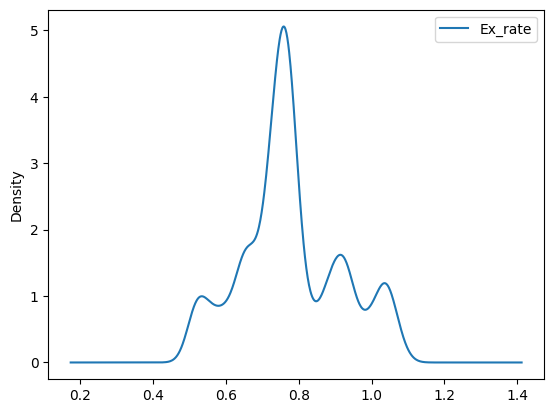

In [164]:
# Density plot

df.plot(kind="kde")
plt.show()

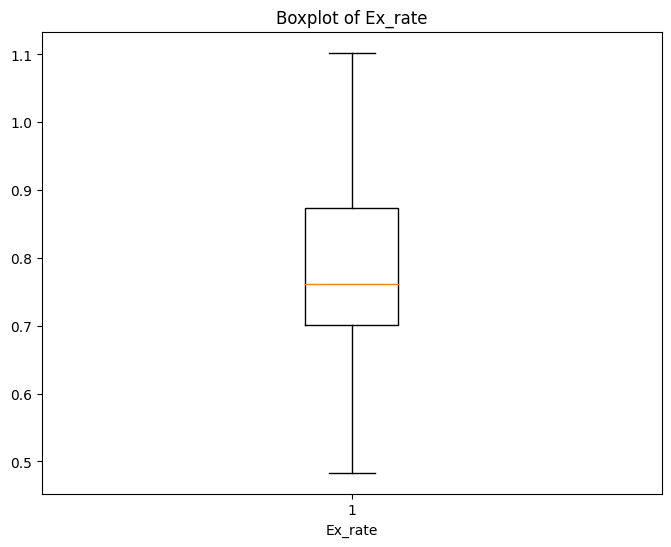

In [165]:
# Boxplot to check for outliers

plt.figure(figsize=(8,6))
plt.boxplot(df["Ex_rate"])
plt.title("Boxplot of Ex_rate")
plt.xlabel("Ex_rate")
plt.show()

<Axes: >

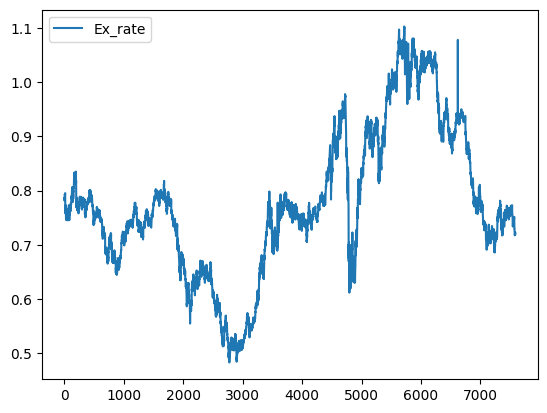

In [166]:
# Line plot

df.plot()

In [167]:
# Extract year from the 'Date' column

df['Year'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M").dt.year
df.head()

,date,Ex_rate,Year
0,01-01-1990 00:00,0.7855,1990
1,02-01-1990 00:00,0.7818,1990
2,03-01-1990 00:00,0.7867,1990
3,04-01-1990 00:00,0.7860,1990
4,05-01-1990 00:00,0.7849,1990


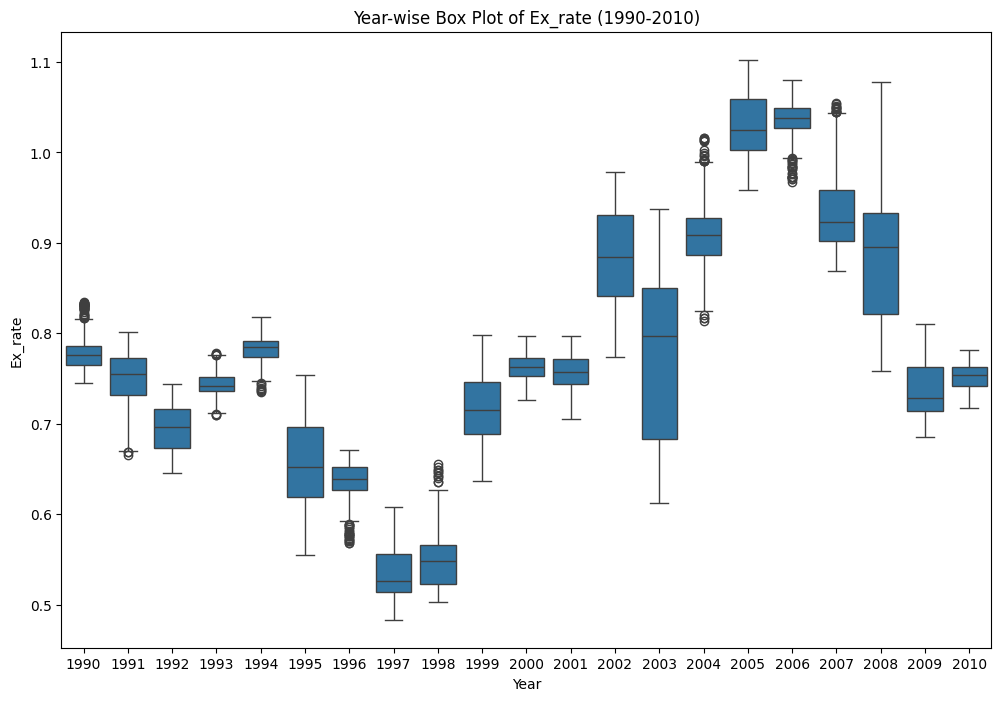

In [168]:
# Create a year-wise box plot using seaborn

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Ex_rate', data=df)
plt.xlabel('Year')
plt.ylabel('Ex_rate')
plt.title('Year-wise Box Plot of Ex_rate (1990-2010)')
plt.show()

In [169]:
# Extract month from the 'Date' column

df['Month'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M").dt.month
df.head()



,date,Ex_rate,Year,Month
0,01-01-1990 00:00,0.7855,1990,1
1,02-01-1990 00:00,0.7818,1990,1
2,03-01-1990 00:00,0.7867,1990,1
3,04-01-1990 00:00,0.7860,1990,1
4,05-01-1990 00:00,0.7849,1990,1


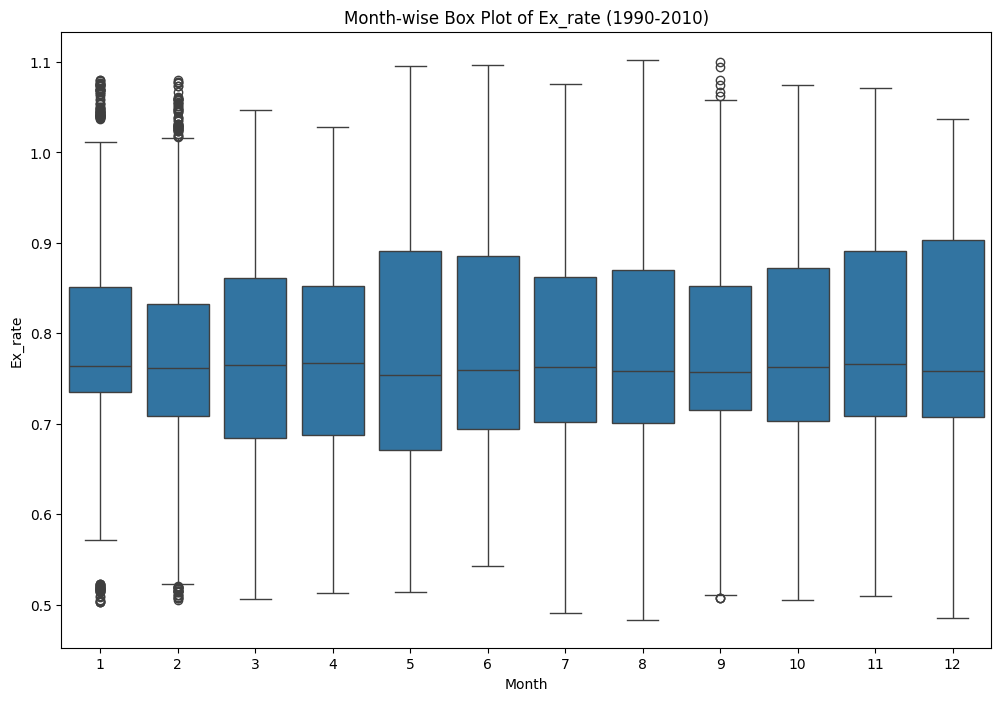

In [170]:
# Create a month-wise box plot using seaborn


plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Ex_rate', data=df)
plt.xlabel('Month')
plt.ylabel('Ex_rate')
plt.title('Month-wise Box Plot of Ex_rate (1990-2010)')
plt.show()

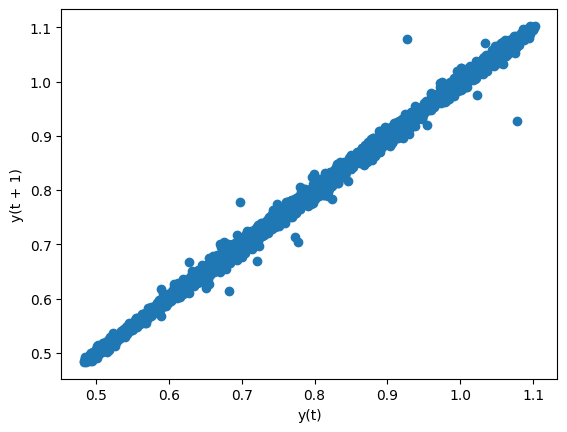

In [171]:
# Scatter plot

from pandas.plotting import lag_plot

lag_plot(df['Ex_rate'])
plt.show()

# **Part 2: Model Building - ARIMA**

<Figure size 4000x1000 with 0 Axes>

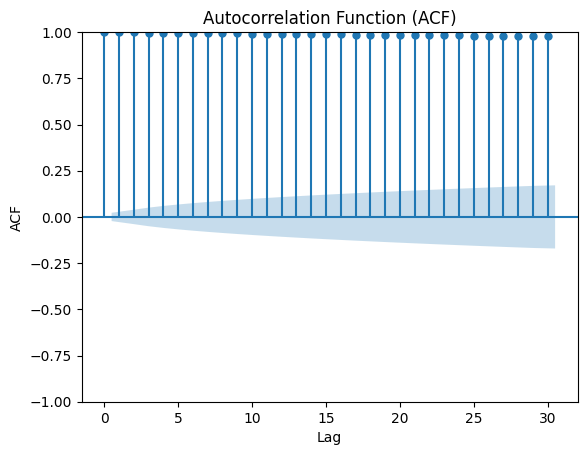

In [172]:
# Autocorrelation plot (ACP)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (40,10))
df = pd.read_csv('exchange_rate.csv', header=0, index_col=0,parse_dates=True)
plot_acf(df,lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

<Figure size 1200x600 with 0 Axes>

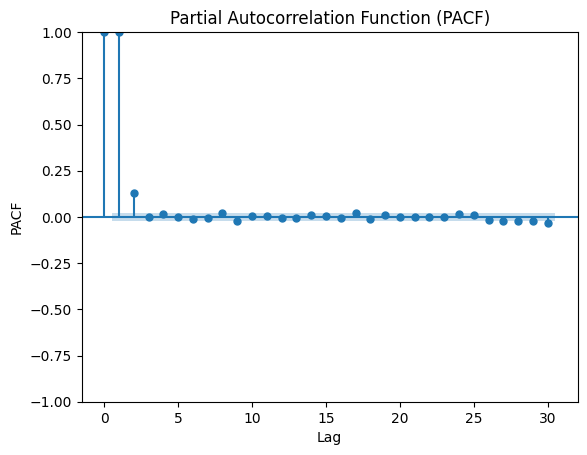

In [173]:
# Partial Autocorrelation Function (PACF)

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'], lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [175]:
from statsmodels.tsa.arima.model import ARIMA


Train = df[['Ex_rate']]

# Splitting data into train and test
Train = Train.head(7576)
Test = Train.tail(12)

# Fit ARIMA model
p = 30  # Autoregression (AR) order
d = 2  # Differencing (I) order
q = 1  # Moving Average (MA) order

# Create and fit ARIMA model
model = ARIMA(Train['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7576
Model:                ARIMA(30, 2, 1)   Log Likelihood               27942.119
Date:                Wed, 01 May 2024   AIC                         -55820.238
Time:                        19:58:21   BIC                         -55598.399
Sample:                             0   HQIC                        -55744.098
                               - 7576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2509      0.029     -8.703      0.000      -0.307      -0.194
ar.L2         -0.1372      0.033     -4.194      0.000      -0.201      -0.073
ar.L3         -0.1483      0.032     -4.651      0.0

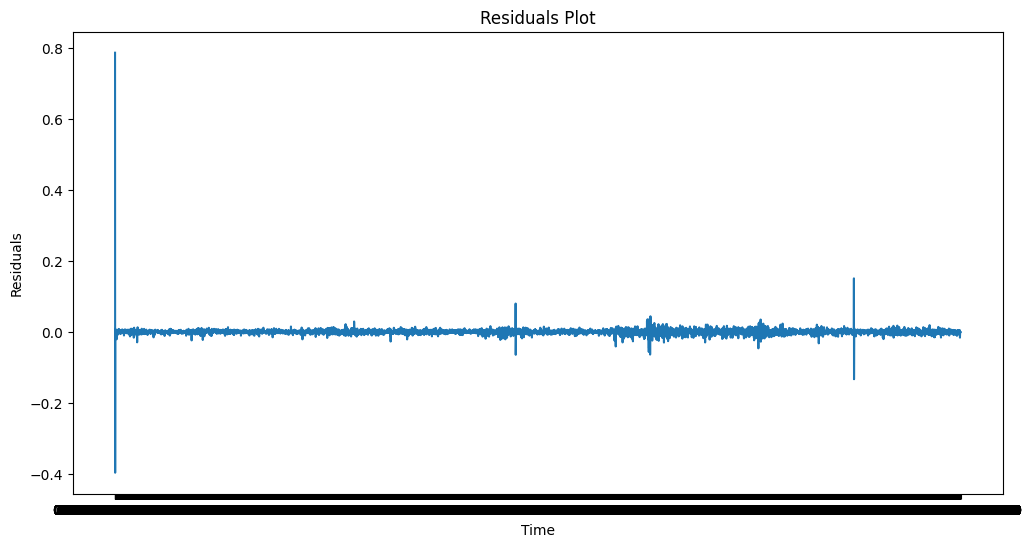

<Figure size 1200x600 with 0 Axes>

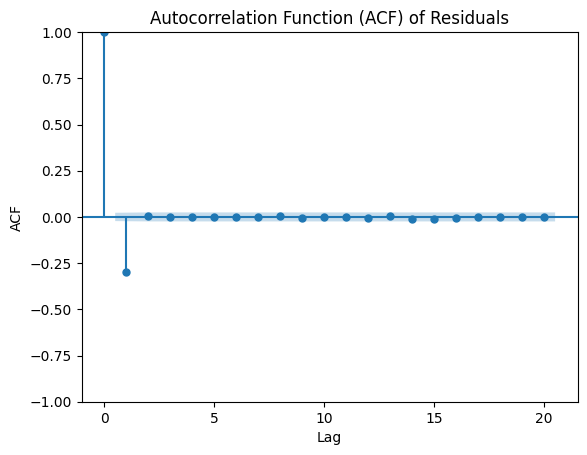

<Figure size 1200x600 with 0 Axes>

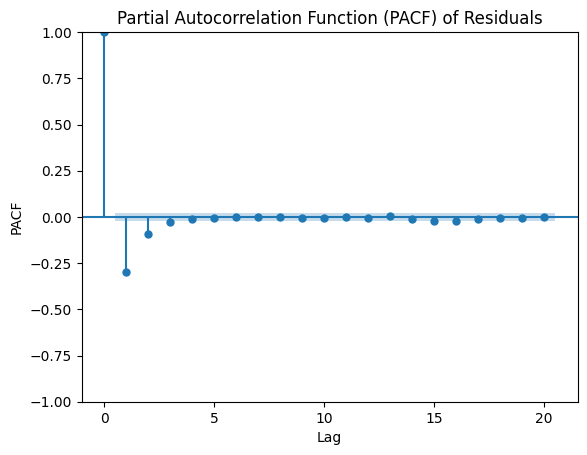

In [177]:
# Diagnostics to analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extract residuals from the fitted model
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Plot ACF and PACF of the residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=20, title='Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=20, title='Partial Autocorrelation Function (PACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


Since, there is no relationship observed in the residuals of the ARIMA model we can therefore conclude that there is no inadequacies in the  model.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


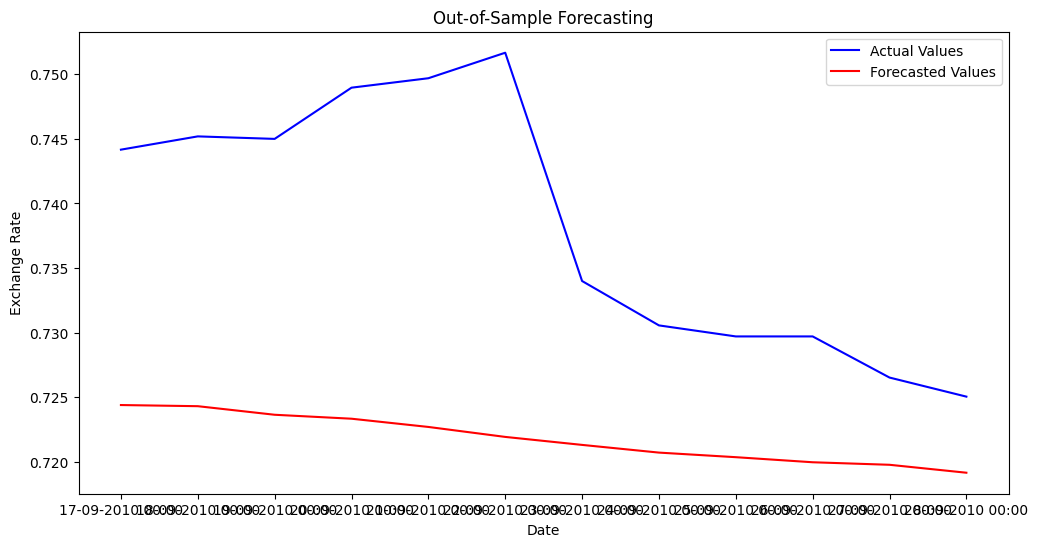

In [179]:
# Forecasting

# Define the number of steps to forecast
n_steps = 12

# Perform out-of-sample forecasting
forecast_values = model_fit.forecast(steps=n_steps)

# Get the actual values for comparison
actual_values = Test.values.flatten()

# Visualize the forecasted values and actual values
plt.figure(figsize=(12, 6))
plt.plot(Test.index, actual_values, label='Actual Values', color='blue')
plt.plot(Test.index, forecast_values, label='Forecasted Values', color='red')
plt.title('Out-of-Sample Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()



# **Part 3: Model Building - Exponential Smoothing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


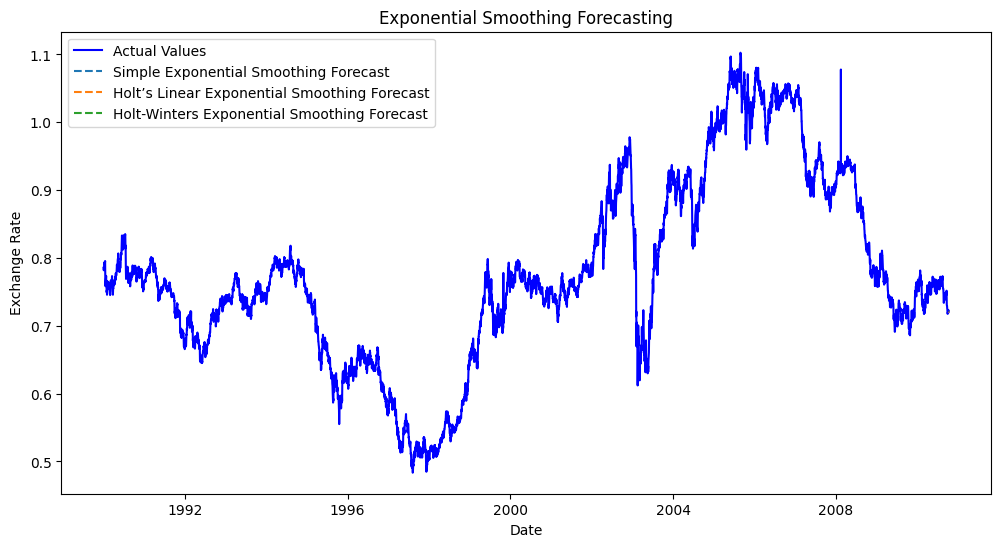

Simple Exponential Smoothing Forecast Values:
2010-10-11    0.720862
2010-10-12    0.720862
2010-10-13    0.720862
2010-10-14    0.720862
2010-10-15    0.720862
Freq: D, dtype: float64
Holt’s Linear Exponential Smoothing Forecast Values:
2010-10-11    0.720590
2010-10-12    0.720354
2010-10-13    0.720118
2010-10-14    0.719882
2010-10-15    0.719646
Freq: D, dtype: float64
Holt-Winters Exponential Smoothing Forecast Values:
2010-10-11    0.720810
2010-10-12    0.720844
2010-10-13    0.720789
2010-10-14    0.720823
2010-10-15    0.720769
Freq: D, dtype: float64


In [188]:
# Create the DataFrame 'df'
df = pd.DataFrame(df)

# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M")

# Define the models
models = {
    'Simple Exponential Smoothing': SimpleExpSmoothing(df['Ex_rate']),
    'Holt’s Linear Exponential Smoothing': Holt(df['Ex_rate']),
    'Holt-Winters Exponential Smoothing': ExponentialSmoothing(df['Ex_rate'], seasonal_periods=2, trend='add', seasonal='add')
}

# Initialize variables to store forecast values for each model
forecast_values_model1 = None
forecast_values_model2 = None
forecast_values_model3 = None

# Fit and forecast with each model
forecast_values = {}
for i, (model_name, model_instance) in enumerate(models.items()):
    model_fit = model_instance.fit()
    forecast_values[model_name] = model_fit.forecast(steps=5)
    if i == 0:
        forecast_values_model1 = forecast_values[model_name]
    elif i == 1:
        forecast_values_model2 = forecast_values[model_name]
    else:
        forecast_values_model3 = forecast_values[model_name]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual Values', color='blue')

# Plot forecast values for each model
for model_name, forecast in forecast_values.items():
    plt.plot(df.index[-1] + pd.to_timedelta(np.arange(1, 6), unit='D'), forecast, label=f'{model_name} Forecast', linestyle='--')

plt.legend()

plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

# Print and verify forecast values
for model_name, forecast in forecast_values.items():
    print(f"{model_name} Forecast Values:")
    print(forecast)

# Save forecast values in separate variables
forecast_values_model1 = forecast_values['Simple Exponential Smoothing']
forecast_values_model2 = forecast_values['Holt’s Linear Exponential Smoothing']
forecast_values_model3 = forecast_values['Holt-Winters Exponential Smoothing']


In [189]:
 # Parameter Optimization

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import ParameterGrid

# Create DataFrame
df = pd.DataFrame(df)

# Convert the index to datetime format
df.index = pd.to_datetime(df.index)

# Define the parameter grid
param_grid = {
    'trend': ['add', 'mul', None],
    'damped': [True, False],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [2, 3, 4]
}

# Generate all possible combinations of parameters
grid = ParameterGrid(param_grid)

best_score = float('inf')
best_params = None

# Iterate over parameter combinations
for params in grid:
    # Only apply damping when trend is not None
    if params['trend'] is None and params['damped']:
        continue

    try:
        model = ExponentialSmoothing(df['Ex_rate'], **params)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_score:
            best_score = aic
            best_params = params
    except ValueError as e:
        # Skip combinations causing initialization error
        if "Cannot compute initial seasonals" in str(e):
            continue

print("Best AIC:", best_score)
print("Best Parameters:", best_params)

<ipython-input-189-b108c350b2a9>:33: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  model = ExponentialSmoothing(df['Ex_rate'], **params)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/pytho

Best AIC: -77644.98075014984
Best Parameters: {'damped': False, 'seasonal': None, 'seasonal_periods': 2, 'trend': None}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<ipython-input-190-d542d642e613>:18: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  model = ExponentialSmoothing(df['Ex_rate'], **best_params)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Actual Values:
date
1990-01-01    0.785500
1990-01-02    0.781800
1990-01-03    0.786700
1990-01-04    0.786000
1990-01-05    0.784900
                ...   
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 7588, dtype: float64
Forecasted Values:
2010-10-11    0.720862
2010-10-12    0.720862
2010-10-13    0.720862
2010-10-14    0.720862
2010-10-15    0.720862
Freq: D, dtype: float64


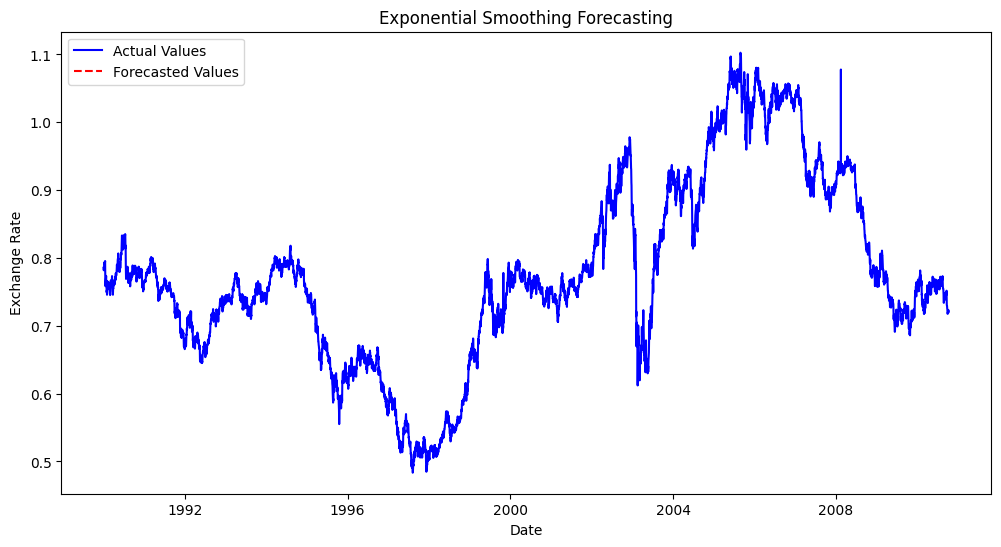

In [190]:
# Model Fitting and Forecasting

# Create DataFrame
df = pd.DataFrame(df)

# Convert the index to datetime format
df.index = pd.to_datetime(df.index)

# Define the best parameters found during parameter optimization
best_params = {
    'trend': None,
    'damped': False,
    'seasonal': None,
    'seasonal_periods': 2
}

# Fit the chosen Exponential Smoothing model
model = ExponentialSmoothing(df['Ex_rate'], **best_params)
model_fit = model.fit()

# Forecast future values
forecast_values = model_fit.forecast(steps=5)

# Print actual and forecasted values
print("Actual Values:")
print(df['Ex_rate'])
print("Forecasted Values:")
print(forecast_values)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual Values', color='blue')
plt.plot(df.index[-1] + pd.to_timedelta(range(1, 6), unit='D'), forecast_values, label='Forecasted Values', color='red', linestyle='--')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# **Part 4: Evaluation and Comparison**

In [191]:
# Compute Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual values for evaluation
actual_values = Test['Ex_rate'][:5]

forecast_values_model1 = forecast_values_model1
forecast_values_model2 = forecast_values_model2
forecast_values_model3 = forecast_values_model3

# Compute Mean Absolute Error (MAE)
mae_model1 = mean_absolute_error(actual_values, forecast_values_model1)
mae_model2 = mean_absolute_error(actual_values, forecast_values_model2)
mae_model3 = mean_absolute_error(actual_values, forecast_values_model3)

# Compute Root Mean Squared Error (RMSE)
rmse_model1 = np.sqrt(mean_squared_error(actual_values, forecast_values_model1))
rmse_model2 = np.sqrt(mean_squared_error(actual_values, forecast_values_model2))
rmse_model3 = np.sqrt(mean_squared_error(actual_values, forecast_values_model3))

# Compute Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_model1 = mean_absolute_percentage_error(actual_values, forecast_values_model1)
mape_model2 = mean_absolute_percentage_error(actual_values, forecast_values_model2)
mape_model3 = mean_absolute_percentage_error(actual_values, forecast_values_model3)

# Print error metrics
print("Error Metrics for Model 1:")
print(f"MAE: {mae_model1}")
print(f"RMSE: {rmse_model1}")
print(f"MAPE: {mape_model1}%")

print("\nError Metrics for Model 2:")
print(f"MAE: {mae_model2}")
print(f"RMSE: {rmse_model2}")
print(f"MAPE: {mape_model2}%")

print("\nError Metrics for Model 3:")
print(f"MAE: {mae_model3}")
print(f"RMSE: {rmse_model3}")
print(f"MAPE: {mape_model3}%")


Error Metrics for Model 1:
MAE: 0.025730790973621808
RMSE: 0.02583001371831261
MAPE: nan%

Error Metrics for Model 2:
MAE: 0.02647443856866081
RMSE: 0.026599278479184137
MAPE: nan%

Error Metrics for Model 3:
MAE: 0.025785764911647458
RMSE: 0.025885660873915924
MAPE: nan%


# **Model Comparison:**

1. Simple Exponential Smoothing (Model 1):
MAE: 0.0257
RMSE: 0.0258
MAPE: NaN%

Performance: Model 1 performs well in terms of MAE and RMSE, indicating relatively low errors in forecasting.

Advantages: Simple and easy to implement, suitable for stable data without trends or seasonality.

Limitations: Doesn't capture trends or seasonality in the data, may not perform well with complex time series patterns.

2. Holt’s Linear Exponential Smoothing (Model 2):
MAE: 0.0265
RMSE: 0.0266
MAPE: NaN%

Performance: Model 2 has slightly higher errors compared to Model 1 but still provides reasonable forecasts.

Advantages: Captures linear trends in the data, suitable for time series with a linear trend component.

Limitations: Doesn't handle seasonality well, may not perform optimally with nonlinear trends.

3. Holt-Winters Exponential Smoothing (Model 3):
MAE: 0.0258
RMSE: 0.0259
MAPE: NaN%

Performance: Model 3 shows similar performance to Model 1 with slightly higher errors.

Advantages: Captures both trends and seasonality in the data, suitable for time series with trends and seasonal patterns.

Limitations: More complex compared to the other models, may require more computational resources, and may overfit noisy data.


Overall, Model 3 (Holt-Winters Exponential Smoothing) has performed better.